In [4]:
library(dplyr)
library(ggplot2)
library(zeallot)

In [5]:
analysis <- function(X, Y, display_plot=TRUE){
    spearman <- cor(X, Y, use="pairwise.complete.obs", method="spearman")
    pearson <- cor(X, Y, use="pairwise.complete.obs", method="pearson")
    print(c("Pearson", pearson))
    print(c("Spearman", spearman))
    if (display_plot) {
        ggplot() + geom_point(aes(x=X, y=Y))
    }
}

regression <- function(X, Y, display_plot=TRUE){
    r <- cor(X, Y, use="pairwise.complete.obs")
    Sx <- sd(X)
    Sy <- sd(Y)
    a <- r * Sy / Sx
    b <- mean(Y) - a * mean(X)

    if(display_plot){
        xs <- seq(min(X), max(X), 0.01)
        plt <- ggplot() +
            geom_point(aes(x=X, y=Y), alpha=0.5) +
            geom_line(aes(x = xs, y = a * xs + b), linewidth=1, col="red")
            show(plt)
    }

    return(c(a, b))
}

In [6]:
data <- read.csv("data.csv")
data2015 <- data %>% filter(year == 2015)
poland <- data %>% filter(country == "Poland")

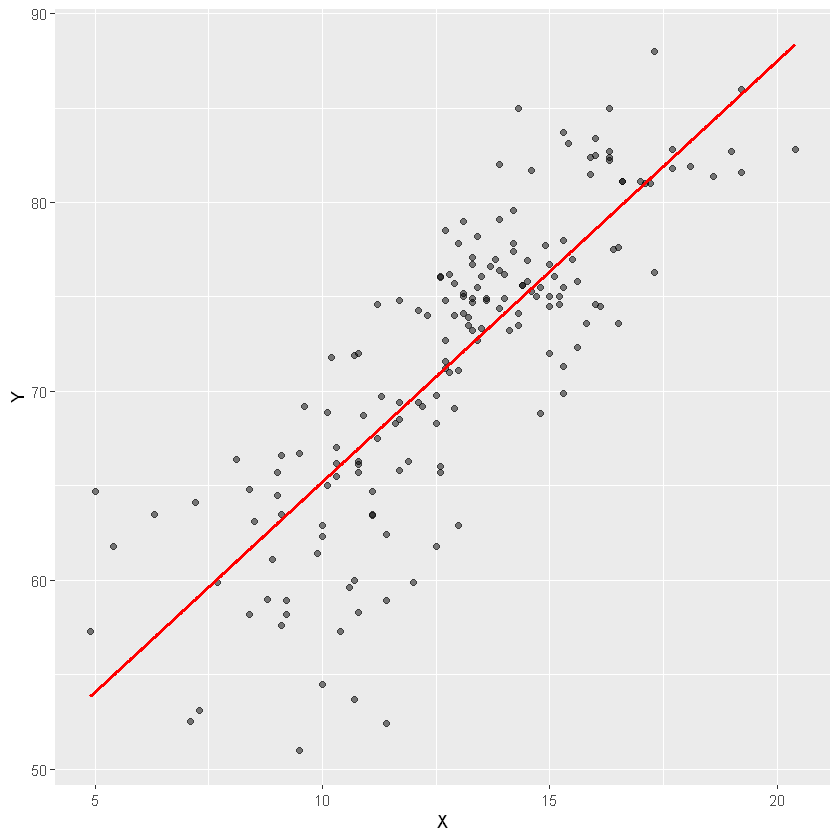

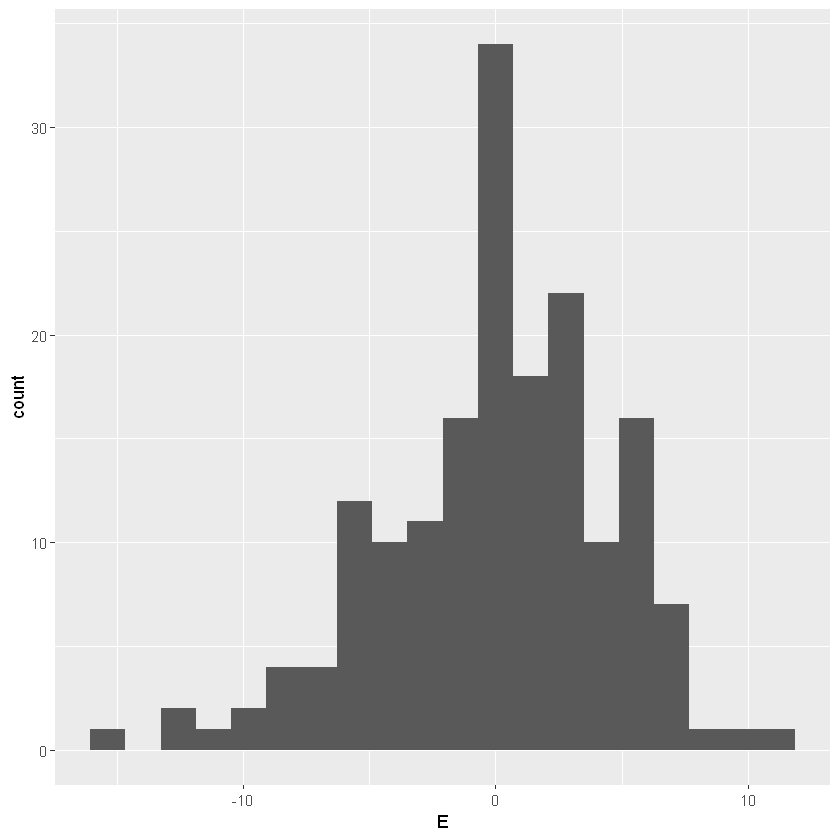

In [13]:
data2015_filtered <- data2015 %>% filter(!is.na(schooling) & !is.na(life_expectancy))
X <- data2015_filtered$schooling
Y <- data2015_filtered$life_expectancy
c(a, b) %<-% regression(X, Y)
E <- Y - a * X - b
ggplot() + geom_histogram(aes(x=E), bins=20)

In [180]:
lista <- c()
for (i in 1:10) {
    lista <- append(lista, i)
}

lista

[1]  1  2  3  4  5  6  7  8  9 10

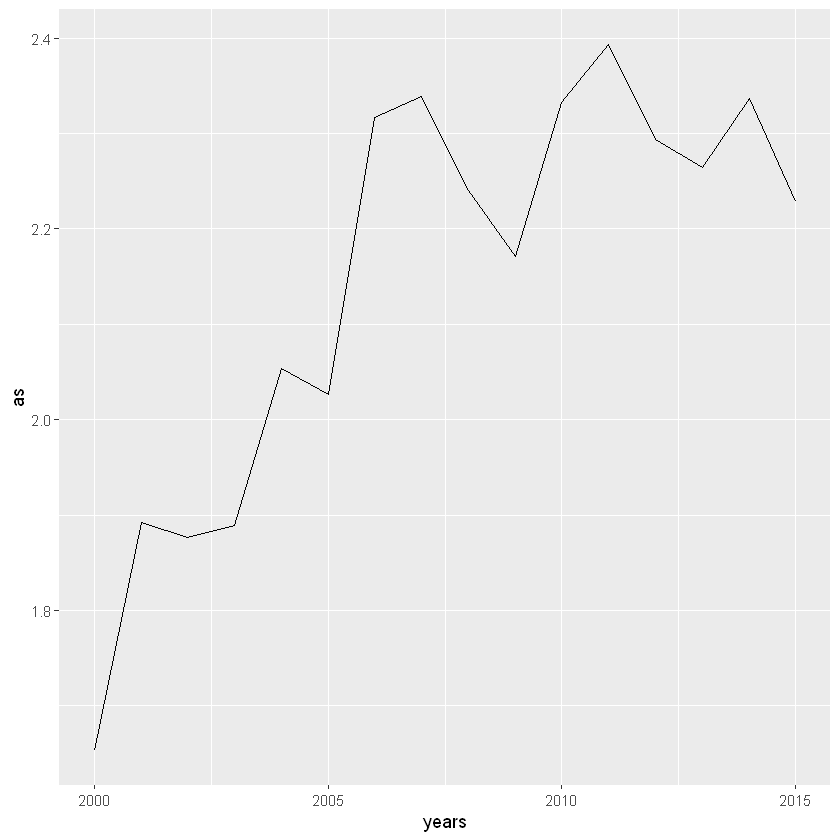

In [206]:
as <- c()
bs <- c()
years <- sort(unique(data$year))
for (y in years) {
    data_filtered <- data %>% filter(year == y & !is.na(schooling) & !is.na(life_expectancy))
    X <- data_filtered$schooling
    Y <- data_filtered$life_expectancy
    c(a, b) %<-% regression(X, Y, display_plot = FALSE)
    as <- append(as, a)
    bs <- append(bs, b)
}

ggplot() + geom_line(aes(x=years, y=as))

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
Warning message:
"Removed 10 rows containing non-finite values (`stat_bin()`)."


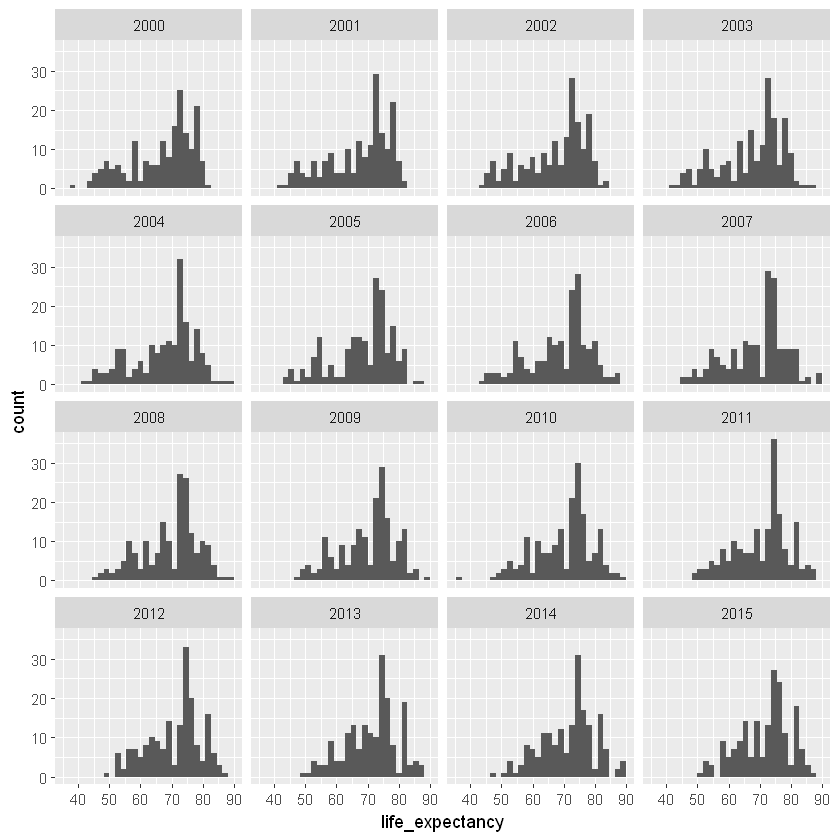

In [208]:
ggplot(data, aes(x=life_expectancy)) + geom_histogram() + facet_wrap(~year)

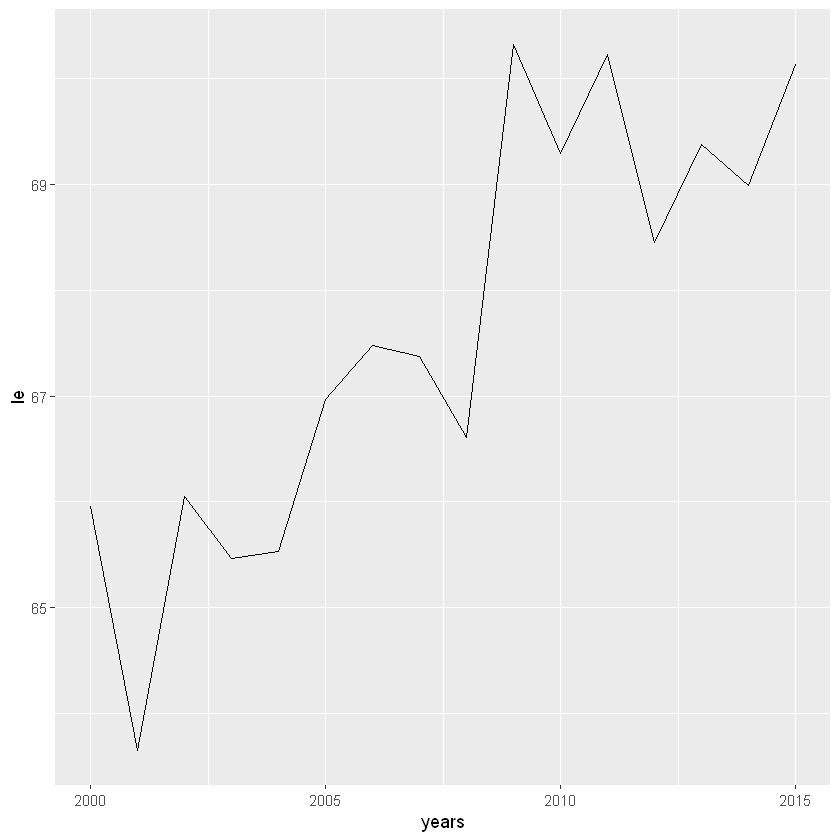

In [9]:
le <- c()
years <- sort(unique(data$year))

for (y in years) {
    data_year <- data %>% filter(year == y & !is.na(life_expectancy) & !is.na(population))
    mean_lf <- sum(data_year$life_expectancy * data_year$population) / sum(data_year$population)
    le <- append(le, mean_lf)
}

ggplot() + geom_line(aes(x=years, y=le))

[1]    0.3644112 -663.9382578

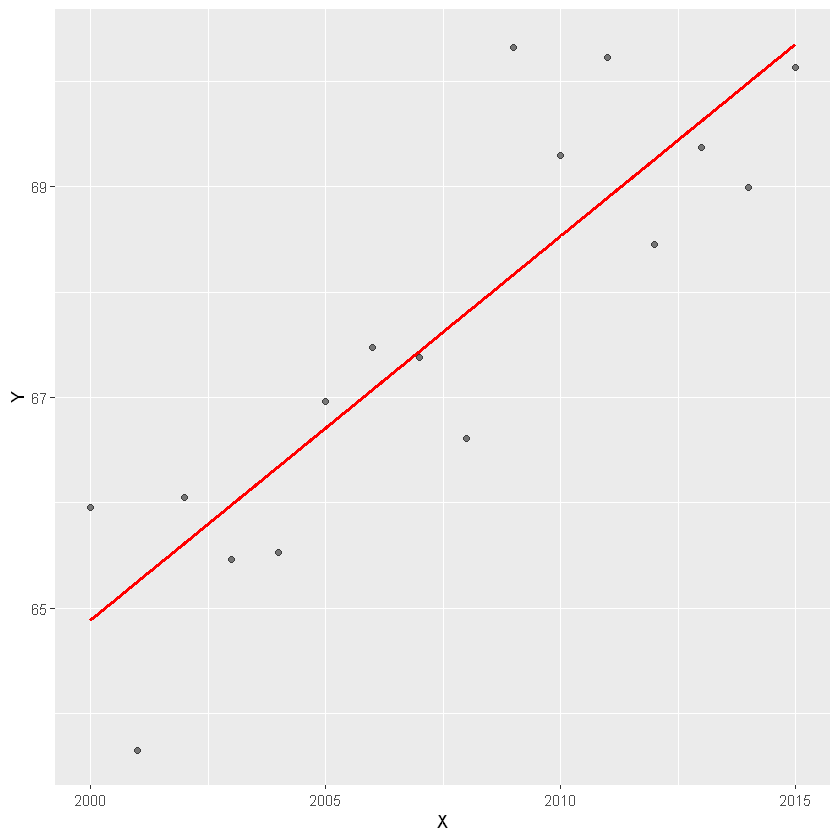

In [14]:
regression(years, le)

[1] "Pearson"           "0.404876761126602"
[1] "Spearman"          "0.442504524305733"


Warning message:
"Removed 203 rows containing missing values (`geom_point()`)."


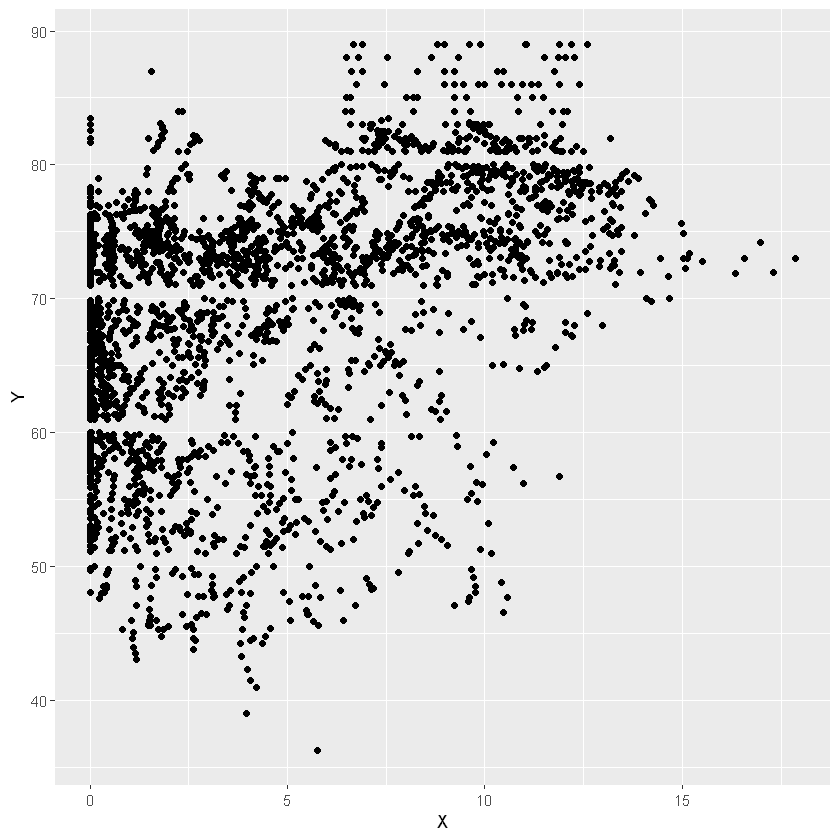

In [11]:
analysis(data$alcohol, data$life_expectancy)

[1] "Pearson"            "-0.556556253400693"
[1] "Spearman"           "-0.753641880116125"


Warning message:
"Removed 10 rows containing missing values (`geom_point()`)."


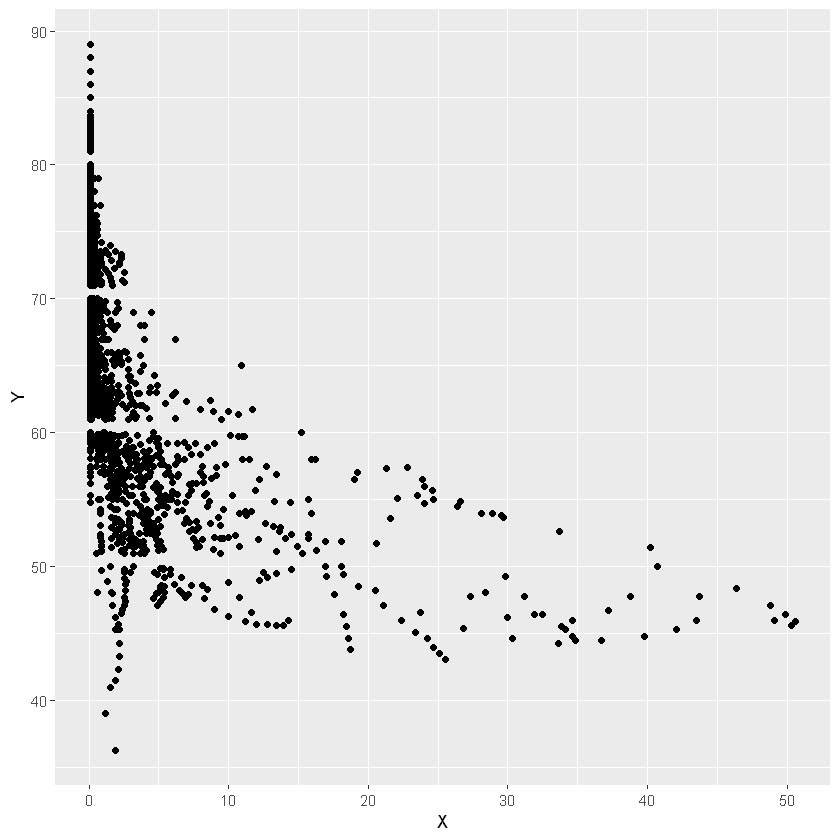

In [45]:
analysis(data$HIV_AIDS, data$life_expectancy)

[1] "Pearson"           "0.461455192620738"
[1] "Spearman"          "0.642470938054315"


Warning message:
"Removed 453 rows containing missing values (`geom_point()`)."


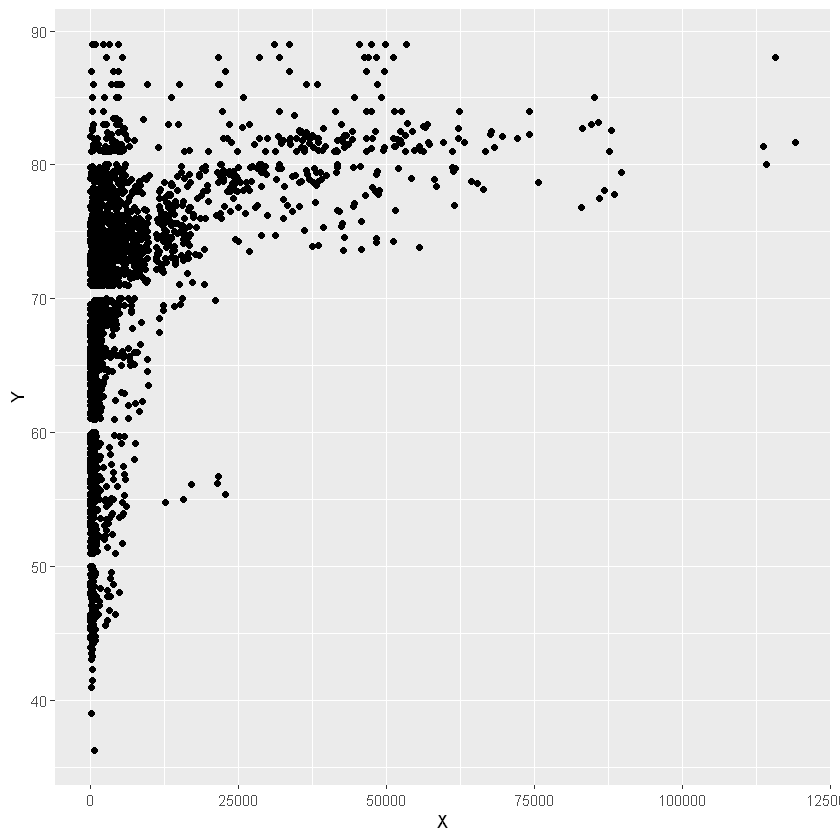

In [46]:
analysis(data$GDP, data$life_expectancy)

[1] "Pearson"            "-0.696359313769976"
[1] "Spearman"           "-0.650006967892821"


Warning message:
"Removed 10 rows containing missing values (`geom_point()`)."


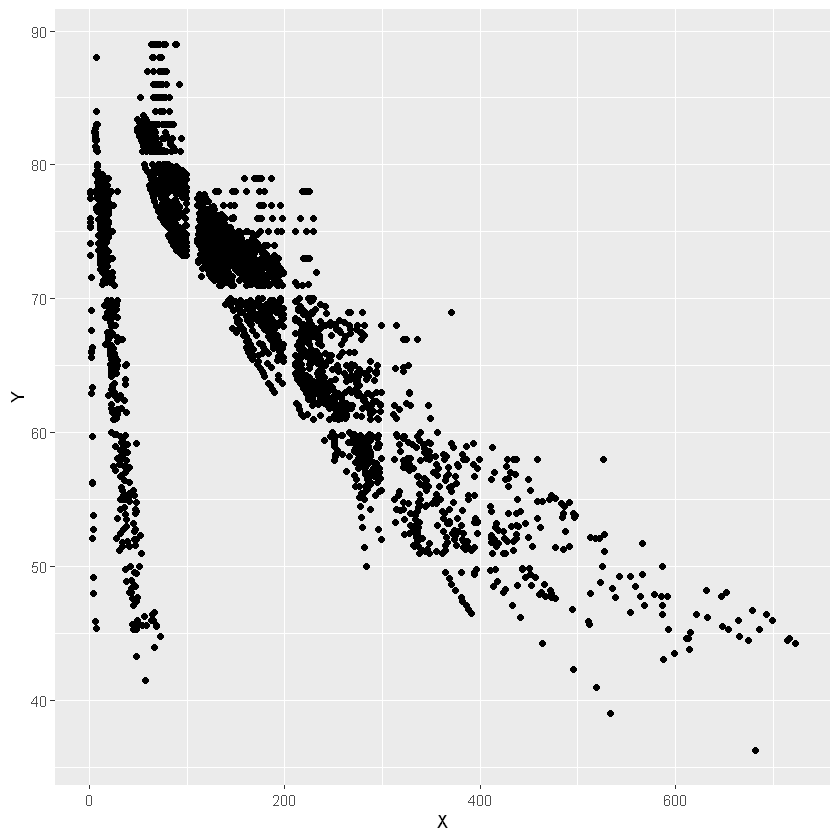

In [47]:
analysis(data$adult_mortality, data$life_expectancy)

Warning message:
"Removed 10 rows containing missing values (`geom_point()`)."
Warning message:
"Removed 630 rows containing missing values (`geom_line()`)."


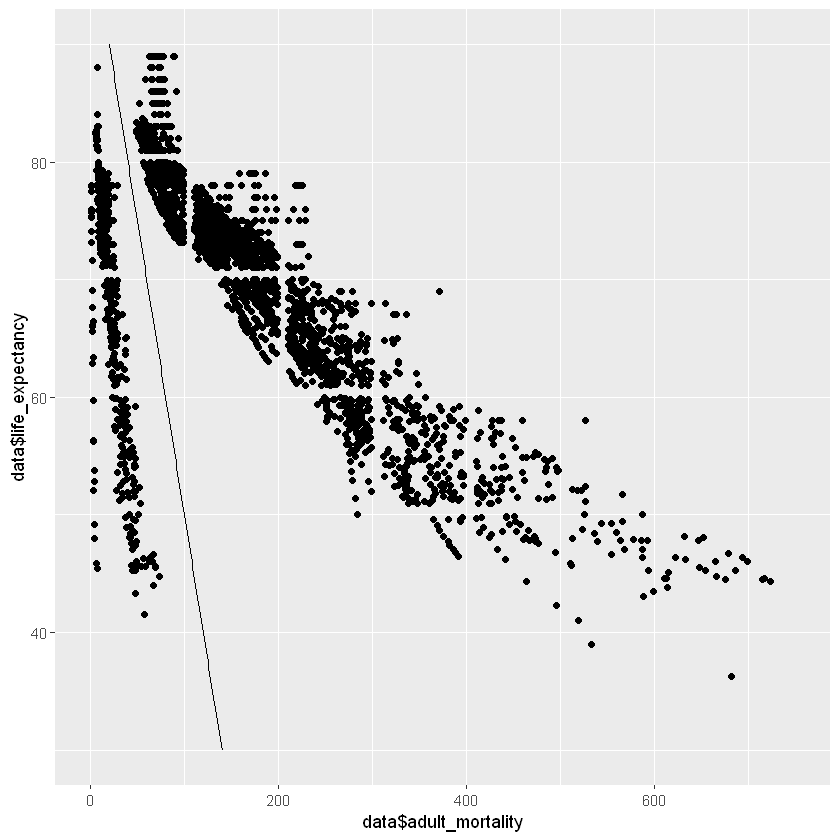

In [26]:
xs <- seq(0, 750, 1)
a <- -0.5
b <- 100
ys <- a * xs + b
ggplot() +
    geom_point(aes(data$adult_mortality, data$life_expectancy)) +
    geom_line(aes(xs, ys)) +
    ylim(30, 90)

Warning message:
"Use of `data$type` is discouraged.
ℹ Use `type` instead."
Warning message:
"Removed 10 rows containing missing values (`geom_point()`)."


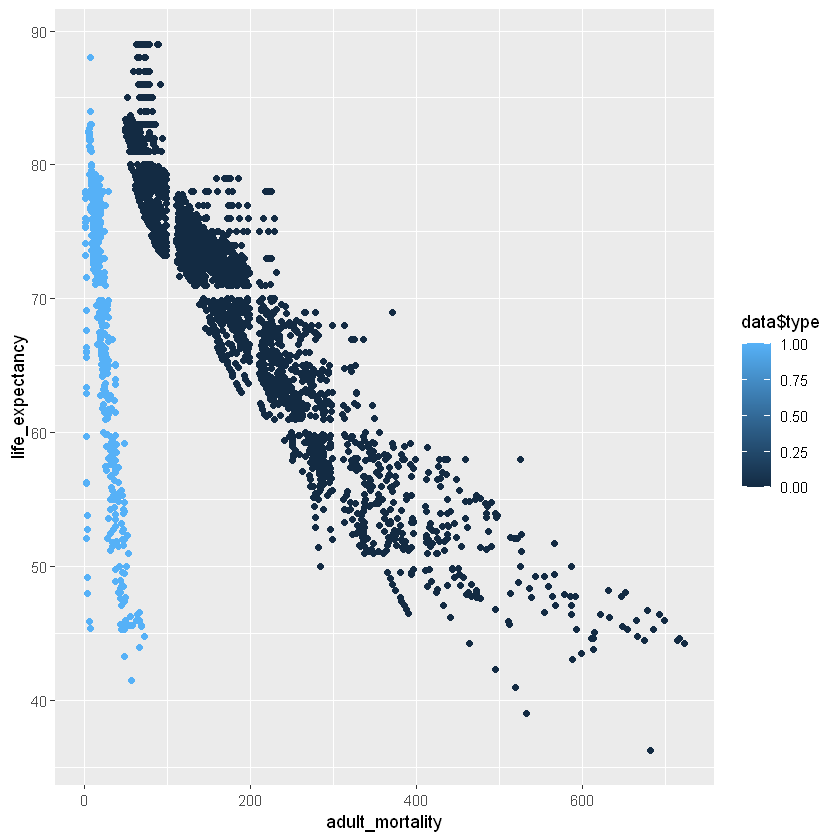

In [27]:
data$type <- 0
data$type[data$life_expectancy < a * data$adult_mortality + b] <- 1
ggplot(data, aes(x=adult_mortality, y=life_expectancy, col=data$type)) + geom_point()

In [36]:
data %>% filter(type == 1)

country,year,status,life_expectancy,adult_mortality,infant_deaths,alcohol,percentage_expenditure,hepatitis_B,measles,⋯,total_expenditure,diphtheria,HIV_AIDS,GDP,population,thinness_1_19_years,thinness_5_9_years,income_composition_of_resources,schooling,type
<chr>,<int>,<chr>,<dbl>,<int>,<int>,<dbl>,<dbl>,<int>,<int>,⋯,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Afghanistan,2002,Developing,56.2,3,88,0.01,16.887351,64,2486,⋯,7.76,36,0.1,187.84595,21979923,19.9,2.2,0.341,6.2,1
Albania,2014,Developing,77.5,8,0,4.51,428.749067,98,0,⋯,5.88,98,0.1,4575.76379,288914,1.2,1.3,0.761,14.2,1
Albania,2008,Developing,75.3,1,1,5.61,36.622068,99,0,⋯,5.87,99,0.1,437.53965,2947314,1.6,1.6,0.713,12.0,1
Albania,2007,Developing,75.9,9,1,5.58,32.246552,98,22,⋯,6.10,98,0.1,363.13685,29717,1.6,1.7,0.703,11.6,1
Albania,2005,Developing,73.5,15,1,5.16,26.993121,98,6,⋯,6.12,98,0.1,279.14293,311487,1.8,1.8,0.685,10.8,1
Albania,2004,Developing,73.0,17,1,4.54,221.842800,99,7,⋯,6.38,97,0.1,2416.58824,326939,1.8,1.9,0.681,10.9,1
Albania,2003,Developing,72.8,18,1,4.29,14.719289,97,8,⋯,6.27,97,0.1,189.68156,339616,1.9,2.0,0.674,10.7,1
Albania,2002,Developing,73.3,15,1,3.73,104.516916,96,16,⋯,6.30,98,0.1,1453.64278,3511,2.0,2.1,0.670,10.7,1
Albania,2001,Developing,73.6,14,1,4.25,96.205571,96,18,⋯,6.00,97,0.1,1326.97339,36173,2.1,2.1,0.662,10.6,1


Warning message:
"Removed 147 rows containing missing values (`geom_point()`)."


[1] -0.6007275

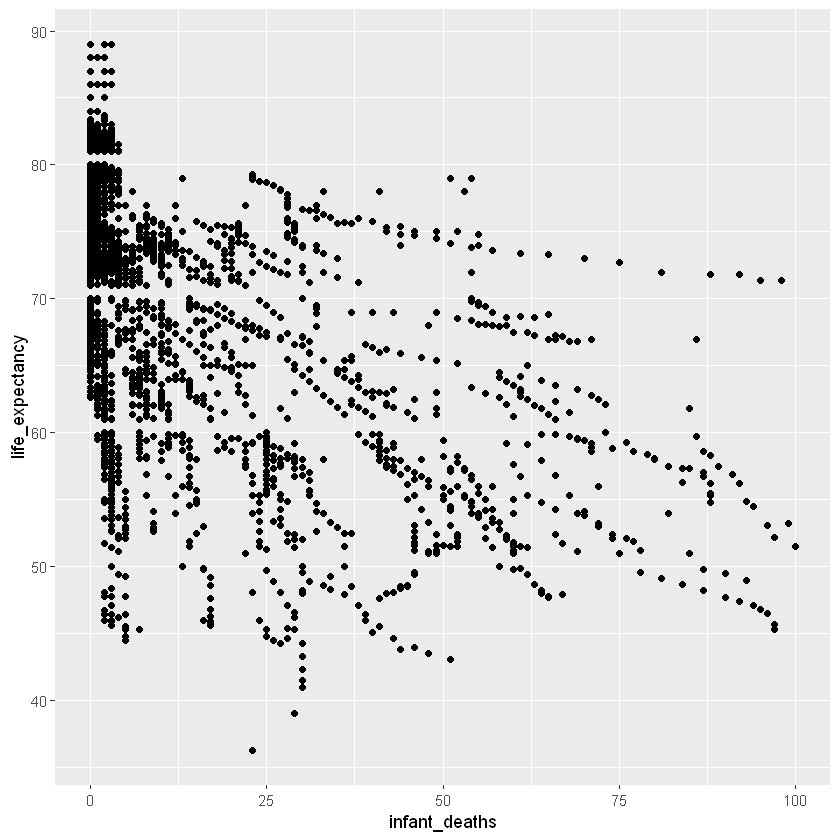

In [31]:
ggplot(aes(x=infant_deaths, y=life_expectancy)) + geom_point() + xlim(0, 100)
cor(data$infant_deaths, data$life_expectancy, use="pairwise.complete.obs", method="spearman")

[1] "Pearson"           "0.301557394491553"
[1] "Spearman"          "0.481300846443494"


Warning message:
"Removed 472 rows containing missing values (`geom_point()`)."


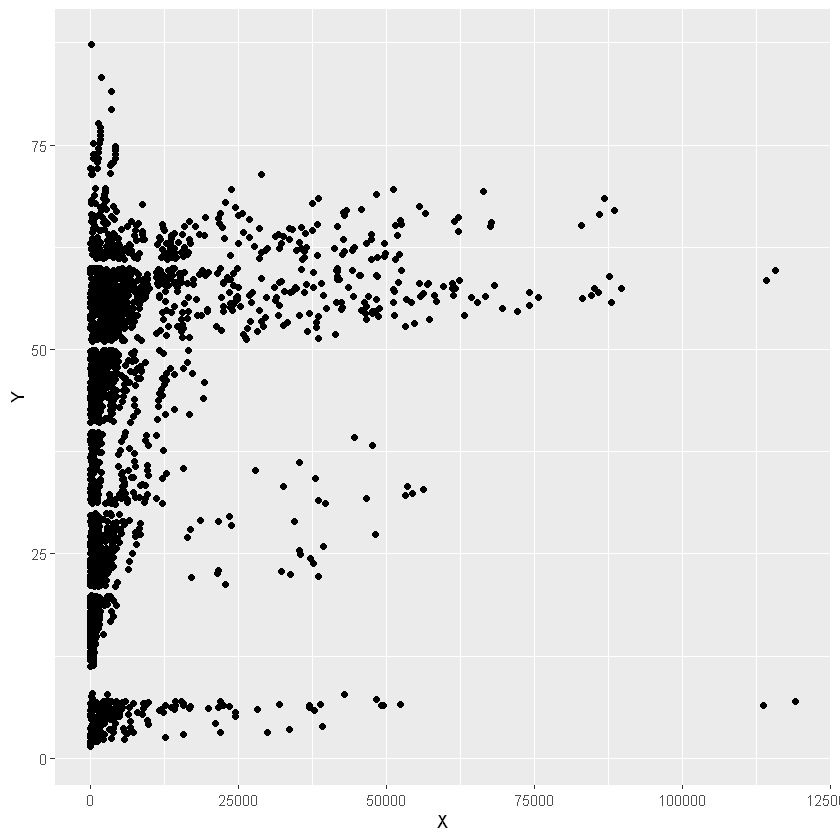

In [48]:
analysis(data$GDP, data$BMI)

[1] "Pearson"           "0.751975462736698"
[1] "Spearman"          "0.813541004769093"


Warning message:
"Removed 170 rows containing missing values (`geom_point()`)."


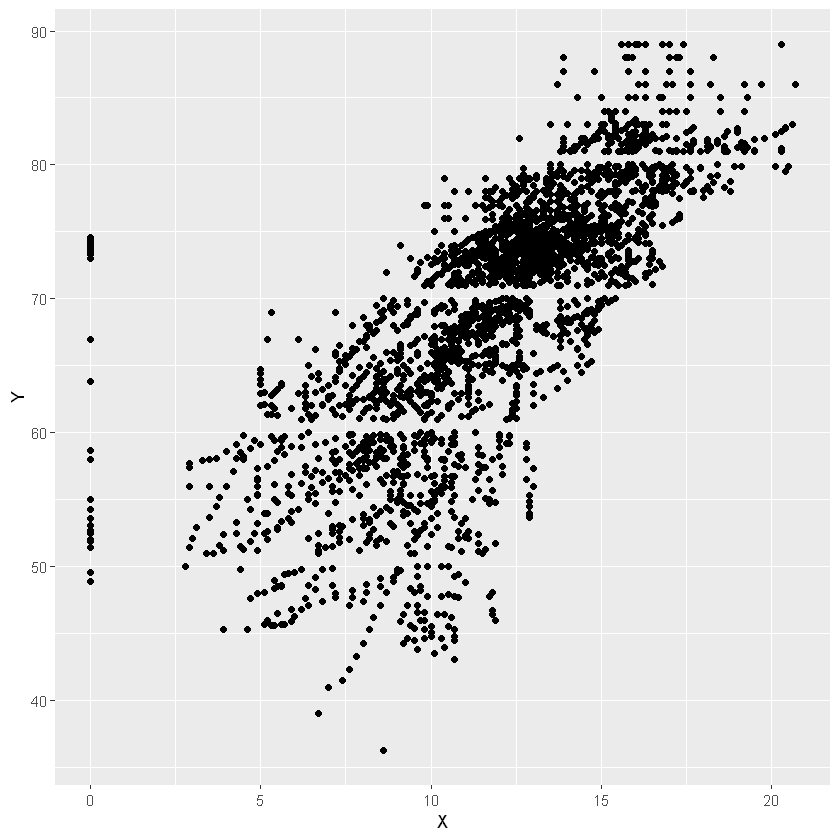

In [49]:
analysis(data$schooling, data$life_expectancy)

[1] "Pearson"           "0.448272829450722"
[1] "Spearman"          "0.665285017917609"


Warning message:
"Removed 451 rows containing missing values (`geom_point()`)."


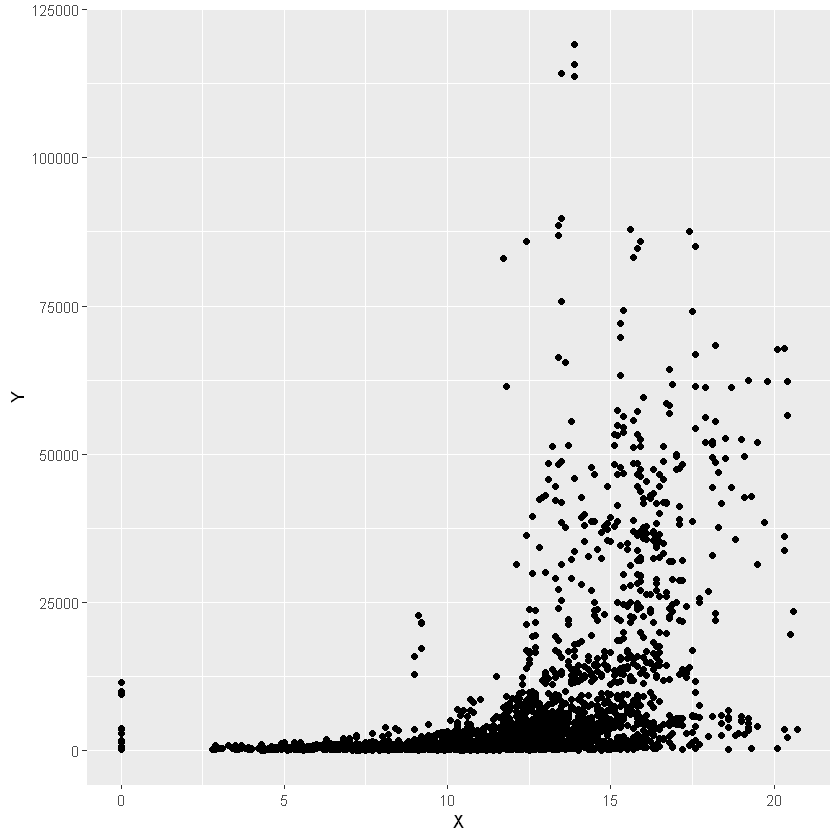

In [50]:
analysis(data$schooling, data$GDP)

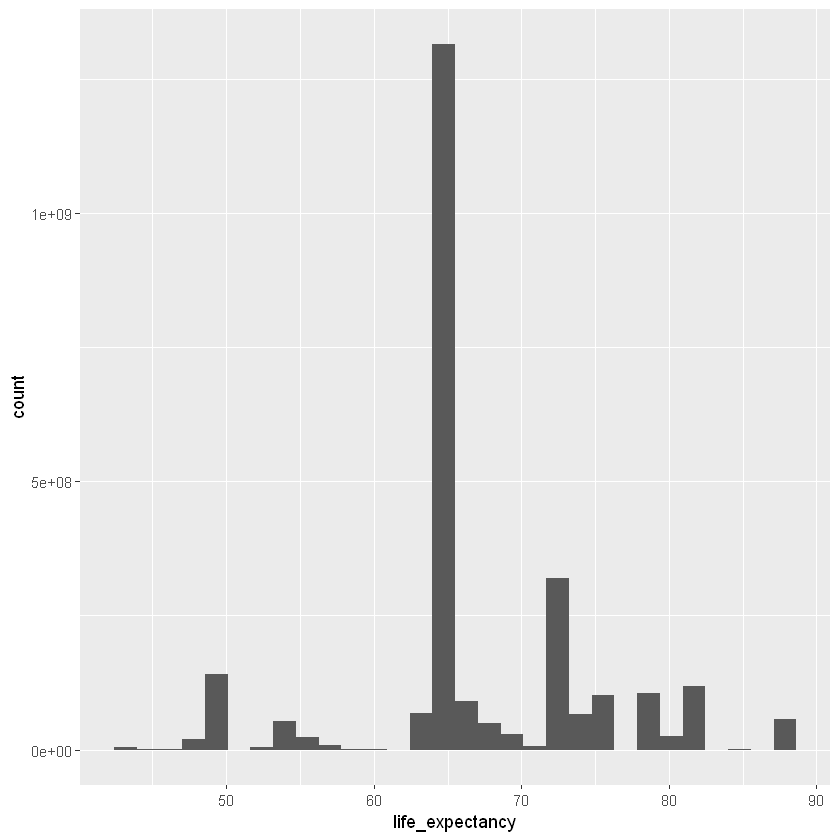

In [35]:
ggplot(data[data$year == 2005,], aes(life_expectancy, weight=population)) + geom_histogram(bins=30)

[1] "Pearson"           "0.907363860239579"
[1] "Spearman"          "0.905150749344808"


Warning message:
"Removed 10 rows containing missing values (`geom_point()`)."


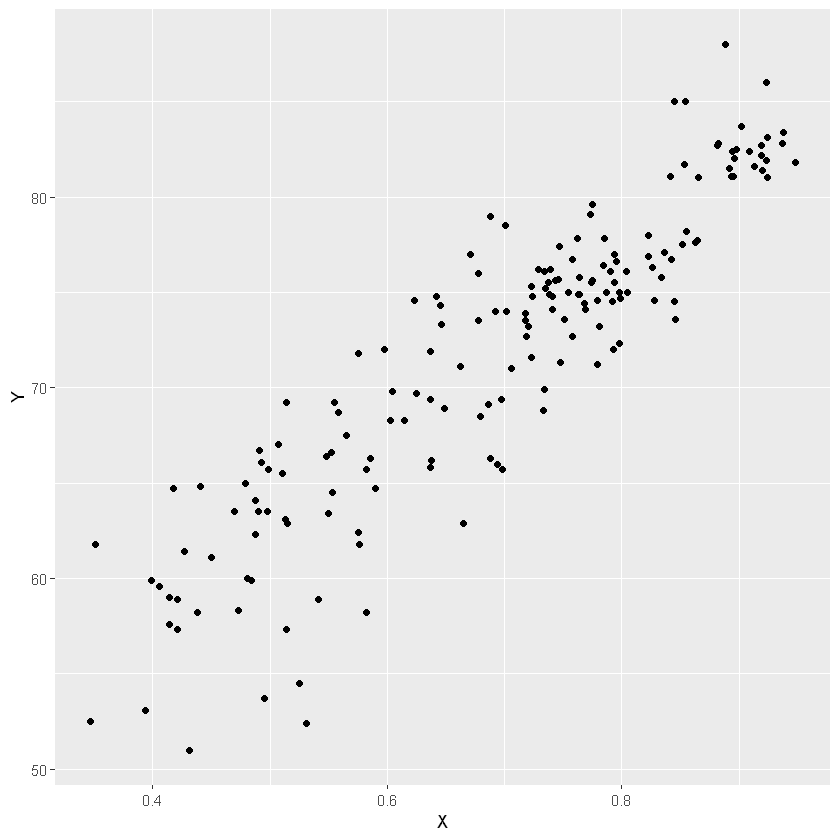

In [76]:
analysis(data2015$income_composition_of_resources, data2015$life_expectancy)

[1] "Pearson"           "0.818159436788872"
[1] "Spearman"          "0.844347924774132"


Warning message:
"Removed 10 rows containing missing values (`geom_point()`)."


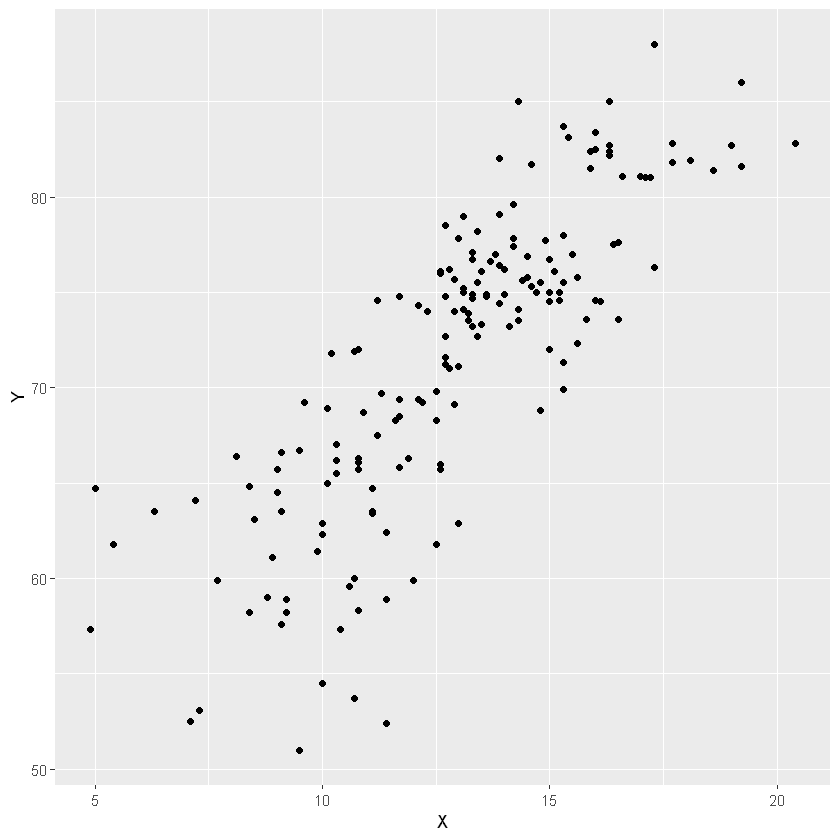

In [55]:
analysis(data2015$schooling, data2015$life_expectancy)

[1] "Pearson"            "-0.608344937357291"
[1] "Spearman"           "-0.777014609759447"


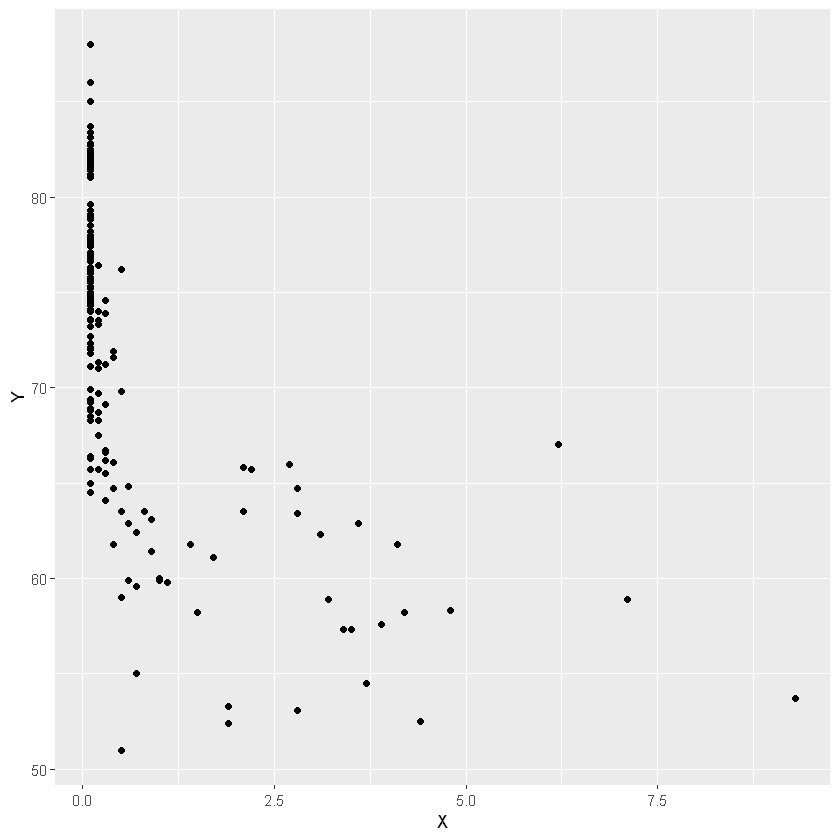

In [77]:
analysis(data2015$HIV_AIDS, data2015$life_expectancy)

In [75]:
correlations <- data.frame()
years <- sort(unique(data$year))
for (y in years) {
    data_year <- data %>% filter(year == y)
    rs <- c()
    for (column in colnames(data_year[5:22])) {
        r <- cor(data_year$life_expectancy, data_year[column], use="pairwise.complete.obs", method="spearman")
        rs <- append(rs, r)
    }
    correlations <- rbind(correlations, rs)
}
correlations <- cbind(years, correlations)
names(correlations) <- colnames(data[c(2, 5:22)])
correlations

year,adult_mortality,infant_deaths,alcohol,percentage_expenditure,hepatitis_B,measles,BMI,under_five_deaths,polio,total_expenditure,diphtheria,HIV_AIDS,GDP,population,thinness_1_19_years,thinness_5_9_years,income_composition_of_resources,schooling
<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
2000,-0.5560994,-0.5836493,0.4265209,0.520736390,0.1426133,-0.4460152,0.5953637,-0.6084559,0.5792283,0.2972901,0.5164042,-0.7160650,0.6526717,-0.139144282,-0.5431118,-0.5401130,0.7158962,0.7692276
2001,-0.5712352,-0.6058871,0.4061352,0.493930532,0.1792613,-0.4649366,0.6379692,-0.6277416,0.5746061,0.2826322,0.6034661,-0.7323258,0.6622943,-0.320366684,-0.4954358,-0.4964462,0.7754650,0.7649567
2002,-0.5765989,-0.6174787,0.4367883,0.533213667,0.3002417,-0.4474379,0.6541614,-0.6347780,0.5726003,0.2569424,0.5798667,-0.7101307,0.7032756,-0.128146566,-0.5794613,-0.5456629,0.7690924,0.7582088
2003,-0.5431431,-0.6146646,0.4315555,0.544062225,0.3478723,-0.3869011,0.5996048,-0.6263682,0.5939277,0.2534010,0.5855287,-0.7444372,0.6778174,-0.174378769,-0.5553633,-0.5664454,0.7930694,0.7688040
2004,-0.7356323,-0.6150892,0.4368289,0.507505150,0.3191865,-0.2569751,0.5557596,-0.6261207,0.4939763,0.2531766,0.5635086,-0.7600465,0.6474292,-0.070000472,-0.5863131,-0.6043774,0.8030363,0.7802273
2005,-0.5351347,-0.6105035,0.4398285,0.544196769,0.3352903,-0.2021607,0.4798180,-0.6156955,0.4937140,0.2582837,0.5242969,-0.7643464,0.6833673,-0.019922326,-0.6009515,-0.6707954,0.8160405,0.7816067
2006,-0.5922460,-0.6197370,0.4559071,0.525019202,0.3301141,-0.2671790,0.6112755,-0.6292004,0.5056204,0.3125080,0.5198434,-0.7571391,0.6284453,-0.171649019,-0.6504388,-0.6952781,0.8943167,0.8248673
2007,-0.6143273,-0.6085290,0.4522770,0.485849346,0.3580259,-0.2158501,0.6215276,-0.6256079,0.5048176,0.2967804,0.5360979,-0.7673788,0.5900070,-0.135307596,-0.6735813,-0.6673306,0.8857543,0.8057945
2008,-0.7807484,-0.6061905,0.4466162,0.458275089,0.3869359,-0.1374949,0.5956404,-0.6236604,0.5298550,0.1942457,0.5234891,-0.7679375,0.5864490,-0.171414325,-0.6796256,-0.6664234,0.8750495,0.7948521


# Polska

In [82]:
poland

country,year,status,life_expectancy,adult_mortality,infant_deaths,alcohol,percentage_expenditure,hepatitis_B,measles,⋯,polio,total_expenditure,diphtheria,HIV_AIDS,GDP,population,thinness_1_19_years,thinness_5_9_years,income_composition_of_resources,schooling
<chr>,<int>,<chr>,<dbl>,<int>,<int>,<dbl>,<dbl>,<int>,<int>,⋯,<int>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Poland,2015,Developed,77.5,117,2,NA,0.000000,96,0,⋯,92,NA,98,0.1,12565.9876,37986412,1.9,2.0,0.852,16.4
Poland,2014,Developed,77.3,12,2,10.71,243.808475,96,0,⋯,94,6.35,98,0.1,14341.6750,3811735,1.9,2.1,0.850,16.4
Poland,2013,Developed,77.1,12,2,11.63,23.435335,96,84,⋯,95,6.40,99,0.1,1378.5491,384196,2.0,2.1,0.838,15.4
Poland,2012,Developed,76.8,125,2,10.81,230.040097,97,71,⋯,95,6.62,99,0.1,13145.1484,3863164,2.0,2.1,0.834,15.3
Poland,2011,Developed,76.7,128,2,10.93,250.077378,98,0,⋯,96,6.70,99,0.1,13893.1877,3863255,2.0,2.2,0.829,15.4
Poland,2010,Developed,76.3,13,2,10.59,220.491685,98,13,⋯,96,6.88,99,0.1,12599.5249,3842794,2.1,2.2,0.822,15.1
Poland,2009,Developed,75.7,136,2,10.70,1299.159757,98,115,⋯,96,7.12,99,0.1,11527.5932,3815163,2.1,2.3,0.818,15.1
Poland,2008,Developed,75.5,14,2,11.40,15.714748,98,0,⋯,96,6.88,99,0.1,141.4469,38125759,2.2,2.3,0.813,15.0
Poland,2007,Developed,75.3,144,2,10.90,14.304245,98,40,⋯,99,6.28,99,0.1,1126.3185,381256,2.2,2.4,0.808,15.0


[1] "Pearson"           "0.991807943340656"
[1] "Spearman"          "0.997058823529412"


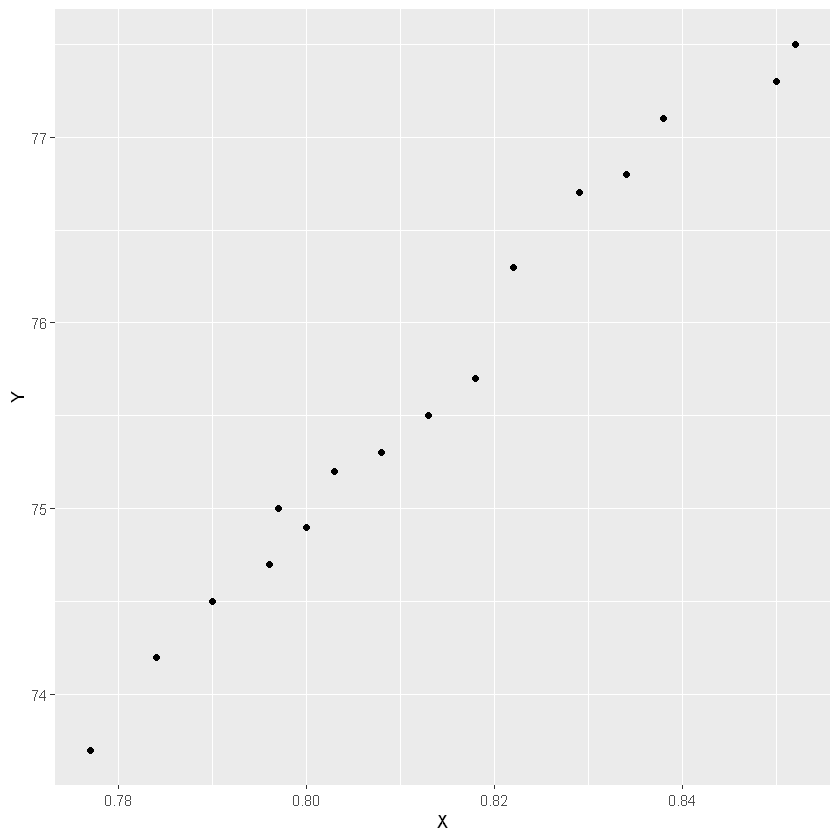

In [91]:
analysis(poland$income_composition_of_resources, poland$life_expectancy)

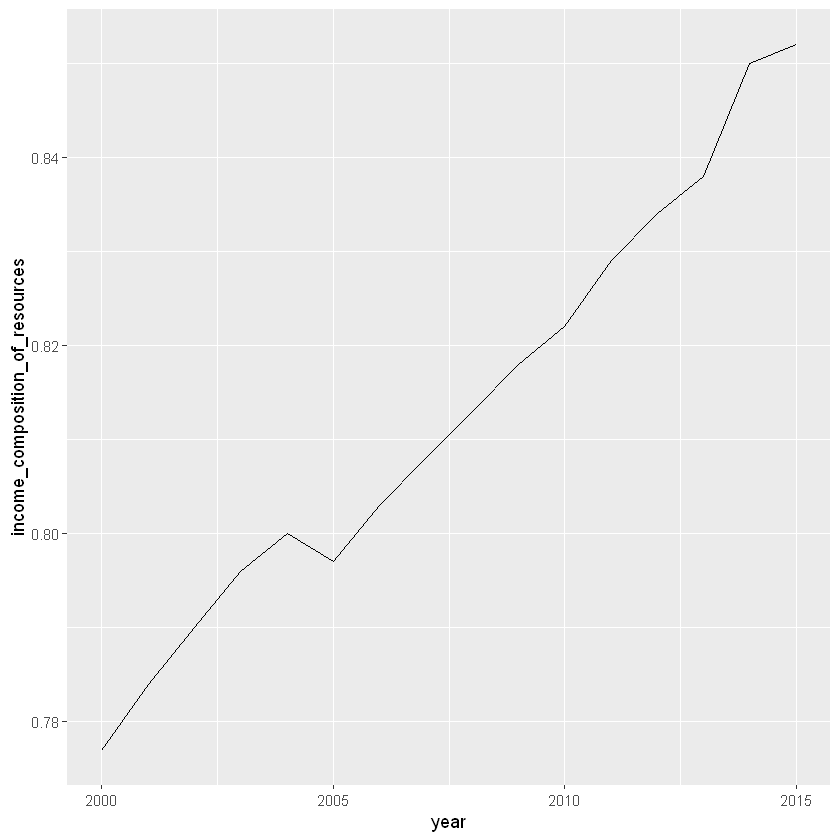

In [93]:
ggplot(poland, aes(x=year, y=income_composition_of_resources)) + geom_line(show.legend = FALSE)